We are going to see what we can do with coverage data generated with JaCoCo. The data was generated from the JUnit4 project, by using the JaCoCo Maven plugin.

In [1]:
import pandas as pd

The data set is just a CSV file.

In [2]:
coverage = pd.read_csv("../datasets/jacoco_junit4.csv")
coverage.head(5)

,GROUP,PACKAGE,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED
0,JUnit,org.junit.internal,Classes,6,14,1,1,2,3,2,2,1,2
1,JUnit,org.junit.internal,ArrayComparisonFailure,0,95,1,5,0,23,1,7,0,5
2,JUnit,org.junit.internal,ExactComparisonCriteria,0,7,0,0,0,3,0,2,0,2
3,JUnit,org.junit.internal,Throwables.State.new Throwables.State() {...},2,6,0,0,1,1,1,1,1,1
4,JUnit,org.junit.internal,Throwables.State.new Throwables.State() {...},0,18,0,4,0,6,0,4,0,2


Now. What can we do with this? Lets first find out how many groups and packages are covered.

In [3]:
packages_covered = coverage[["GROUP", "PACKAGE"]]
packages_covered.value_counts()

GROUP  PACKAGE                                  
JUnit  org.junit.rules                              25
       org.junit.runners                            21
       org.junit.internal                           20
       org.junit.runner                             17
       org.junit.internal.runners                   17
       org.junit.runners.model                      16
       org.junit.runner.notification                15
       org.junit.runner.manipulation                14
       junit.framework                              14
       org.junit.internal.runners.rules             11
       org.junit.internal.management                10
       org.junit.experimental.theories              10
       org.junit.internal.builders                   8
       org.junit.experimental.categories             8
       org.junit.validator                           8
       org.junit.internal.runners.statements         8
       org.junit.internal.requests                   7
       org.junit

The third column tells how many classes are on each package. As each class appears just once.

Now the question is, how many classes are in the report?

In [4]:
coverage[["CLASS"]].count()

CLASS    285
dtype: int64

All these classes appear on the coverage report. But does that mean that all of them are covered by the tests?

In [5]:
not_covered = coverage.loc[coverage["LINE_COVERED"] == 0]
not_covered

,GROUP,PACKAGE,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED
35,JUnit,org.junit.internal.management,ReflectiveRuntimeMXBean.Holder,20,0,0,0,9,0,1,0,1,0
39,JUnit,org.junit.internal.management,FakeThreadMXBean,9,0,0,0,3,0,3,0,3,0
41,JUnit,org.junit.internal.management,FakeRuntimeMXBean,5,0,0,0,2,0,2,0,2,0
42,JUnit,org.junit.internal.management,ManagementFactory.RuntimeHolder,16,0,2,0,3,0,3,0,2,0
43,JUnit,org.junit.internal.management,ReflectiveRuntimeMXBean,25,0,2,0,11,0,3,0,2,0
135,JUnit,org.junit.internal.runners,JUnit4ClassRunner.new Comparator() {...},21,0,0,0,2,0,2,0,2,0
142,JUnit,org.junit.internal.runners,FailedBefore,3,0,0,0,1,0,1,0,1,0
145,JUnit,org.junit.internal.runners,MethodRoadie.new Runnable() {...},56,0,2,0,15,0,3,0,2,0
147,JUnit,org.junit.internal.runners,MethodRoadie.1.new Callable() {...},12,0,0,0,3,0,2,0,2,0
154,JUnit,org.junit.experimental.max,CouldNotReadCoreException,4,0,0,0,2,0,1,0,1,0


Which percentage of the code is not covered at all?

In [6]:
def getPercent(part,whole):
    return 100 * part / whole

In [7]:
# Row counts
total_coverage_rows = len(coverage.index)
not_covered_rows = len(not_covered.index)
covered_rows = total_coverage_rows - not_covered_rows

# Percentage, from the row counts
covered_percent = getPercent(covered_rows, total_coverage_rows)
not_covered_percent = getPercent(not_covered_rows, total_coverage_rows)

# Dataframe
coverage_percents_data = [[covered_percent, not_covered_percent]]
coverage_percents = pd.DataFrame(coverage_percents_data, columns = ['Class coverage %', 'Class missed %'])
coverage_percents

,Class coverage %,Class missed %
0,94.736842,5.263158


<AxesSubplot:>

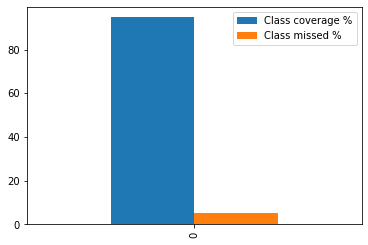

In [8]:
coverage_percents.plot.bar()

Not all classes are covered equally. What is the average line coverage?

In [10]:
# The total number of lines is [lines covered] + [lines missed]
coverage["LINE_COVERAGE_%"] = coverage.apply(lambda x: getPercent(x["LINE_COVERED"], x["LINE_COVERED"] + x["LINE_MISSED"]), axis=1)
coverage.head()

,GROUP,PACKAGE,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,LINE_COVERAGE_%
0,JUnit,org.junit.internal,Classes,6,14,1,1,2,3,2,2,1,2,60.0
1,JUnit,org.junit.internal,ArrayComparisonFailure,0,95,1,5,0,23,1,7,0,5,100.0
2,JUnit,org.junit.internal,ExactComparisonCriteria,0,7,0,0,0,3,0,2,0,2,100.0
3,JUnit,org.junit.internal,Throwables.State.new Throwables.State() {...},2,6,0,0,1,1,1,1,1,1,50.0
4,JUnit,org.junit.internal,Throwables.State.new Throwables.State() {...},0,18,0,4,0,6,0,4,0,2,100.0


In [11]:
line_coverage = coverage[["GROUP", "PACKAGE", "CLASS", "LINE_COVERED", "LINE_MISSED", "LINE_COVERAGE_%"]]
line_coverage.head()

,GROUP,PACKAGE,CLASS,LINE_COVERED,LINE_MISSED,LINE_COVERAGE_%
0,JUnit,org.junit.internal,Classes,3,2,60.0
1,JUnit,org.junit.internal,ArrayComparisonFailure,23,0,100.0
2,JUnit,org.junit.internal,ExactComparisonCriteria,3,0,100.0
3,JUnit,org.junit.internal,Throwables.State.new Throwables.State() {...},1,1,50.0
4,JUnit,org.junit.internal,Throwables.State.new Throwables.State() {...},6,0,100.0


In [13]:
coverage["LINE_COVERAGE_%"].mean()

86.24182154664328

In [15]:
coverage["LINE_COVERAGE_%"].median()

100.0

In [16]:
# Averages
line_coverage_mean = coverage["LINE_COVERAGE_%"].mean()
line_coverage_median = coverage["LINE_COVERAGE_%"].median()

# Added to the dataset
coverage_percents["Mean line %"] = line_coverage_mean
coverage_percents["Median line %"] = line_coverage_median
coverage_percents

,Class coverage %,Class missed %,Mean line %,Median line %
0,94.736842,5.263158,86.241822,100.0


<AxesSubplot:>

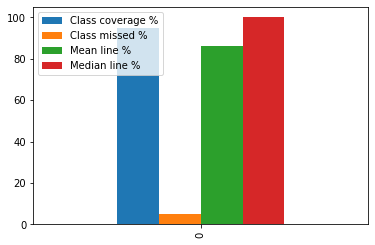

In [17]:
coverage_percents.plot.bar()